In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore") 

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:ylabel='Pregnancies'>

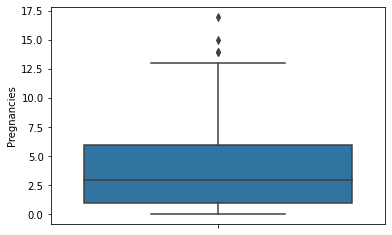

In [7]:
sns.boxplot(df.Pregnancies, orient="v")

In [8]:
df=df[df.Pregnancies<13]

<AxesSubplot:ylabel='Pregnancies'>

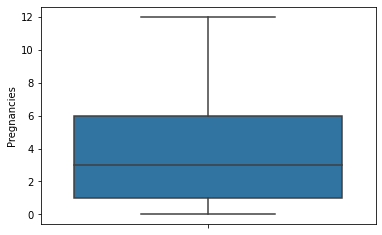

In [9]:
sns.boxplot(df.Pregnancies, orient="v")

<AxesSubplot:ylabel='SkinThickness'>

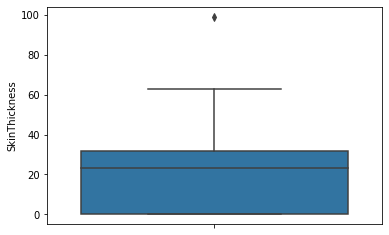

In [10]:
sns.boxplot(df.SkinThickness, orient="v")

In [11]:
df=df[df.SkinThickness<70]

<AxesSubplot:ylabel='SkinThickness'>

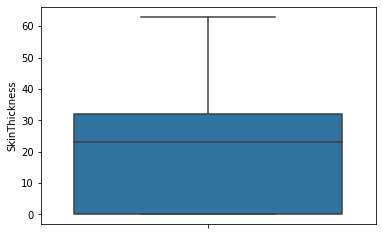

In [12]:
sns.boxplot(df.SkinThickness, orient="v")

In [13]:
df.shape

(753, 9)

<AxesSubplot:ylabel='Insulin'>

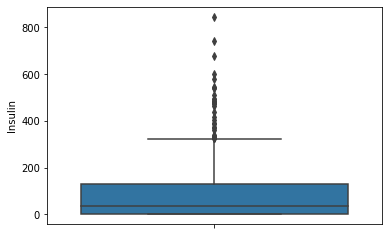

In [14]:
sns.boxplot(df.Insulin, orient="v")

<AxesSubplot:ylabel='Glucose'>

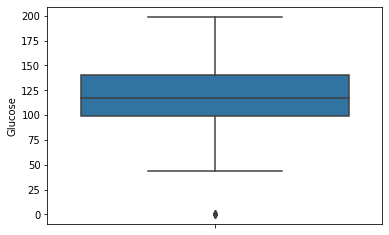

In [15]:
sns.boxplot(df.Glucose, orient="v")

In [16]:
df=df[df.Glucose>0]

<AxesSubplot:ylabel='Glucose'>

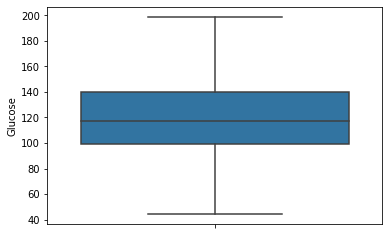

In [17]:
sns.boxplot(df.Glucose, orient="v")

<AxesSubplot:ylabel='BloodPressure'>

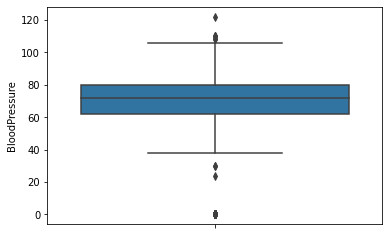

In [18]:
sns.boxplot(df.BloodPressure, orient="v")

In [19]:
df=df[df.BloodPressure>35]

<AxesSubplot:ylabel='BloodPressure'>

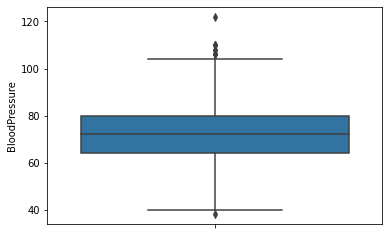

In [20]:
sns.boxplot(df.BloodPressure, orient="v")

<AxesSubplot:>

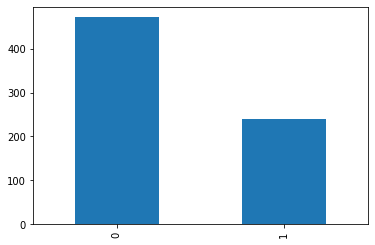

In [21]:
df.Outcome.value_counts().plot.bar()

In [22]:
df.shape

(711, 9)

<AxesSubplot:>

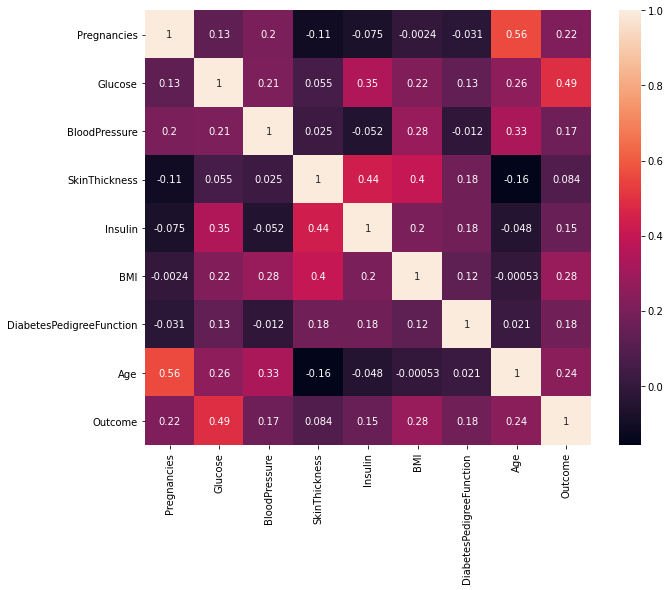

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

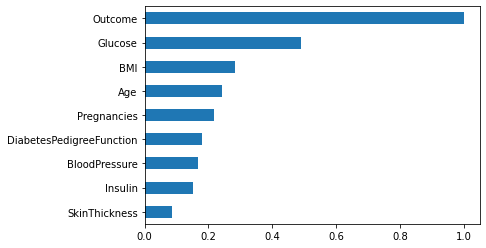

In [24]:
df.corr()["Outcome"].sort_values().plot.barh()

In [26]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [27]:
X.shape

(711, 8)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
X_train.shape

(533, 8)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

In [32]:
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [36]:
cnf_matrix             # TN - FP / FN - TP

array([[106,  14],
       [ 24,  34]])

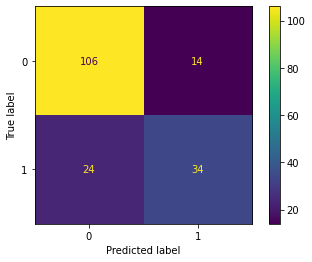

In [38]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       120
           1       0.71      0.59      0.64        58

    accuracy                           0.79       178
   macro avg       0.76      0.73      0.74       178
weighted avg       0.78      0.79      0.78       178

